# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0017'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('elephant')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

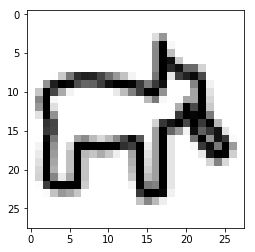

In [5]:
plt.imshow(x_train[0,:,:,0], cmap = 'gray_r')

In [6]:
np.min(x_train[0])

-1.0

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008 
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,1]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004 
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 14, 14, 128)       204928    
__________

## training

In [ ]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.701745] [D acc: 0.507812] [G loss: 0.138098] [G acc: 1.000000]
1 [D loss: 1.749384] [D acc: 0.500000] [G loss: 0.675620] [G acc: 0.992188]
2 [D loss: 0.686302] [D acc: 0.500000] [G loss: 0.659654] [G acc: 1.000000]
3 [D loss: 0.677786] [D acc: 0.503906] [G loss: 0.568032] [G acc: 1.000000]
4 [D loss: 0.652101] [D acc: 0.500000] [G loss: 0.270514] [G acc: 1.000000]
5 [D loss: 1.527467] [D acc: 0.500000] [G loss: 0.712574] [G acc: 0.171875]
6 [D loss: 0.679208] [D acc: 0.679688] [G loss: 0.705938] [G acc: 0.359375]
7 [D loss: 0.643386] [D acc: 0.929688] [G loss: 0.779651] [G acc: 0.062500]
8 [D loss: 0.570673] [D acc: 0.882812] [G loss: 0.605798] [G acc: 0.734375]
9 [D loss: 0.327164] [D acc: 1.000000] [G loss: 0.703953] [G acc: 0.609375]
10 [D loss: 1.474987] [D acc: 0.496094] [G loss: 1.091889] [G acc: 0.000000]
11 [D loss: 0.987049] [D acc: 0.500000] [G loss: 0.697437] [G acc: 0.453125]
12 [D loss: 0.633898] [D acc: 0.800781] [G loss: 0.697235] [G acc: 0.390625]
13 [D los

107 [D loss: 0.814210] [D acc: 0.496094] [G loss: 0.755342] [G acc: 0.343750]
108 [D loss: 0.526486] [D acc: 0.914062] [G loss: 0.791126] [G acc: 0.351562]
109 [D loss: 0.674646] [D acc: 0.621094] [G loss: 0.835819] [G acc: 0.164062]
110 [D loss: 0.622558] [D acc: 0.757812] [G loss: 0.966733] [G acc: 0.109375]
111 [D loss: 0.616877] [D acc: 0.683594] [G loss: 0.773359] [G acc: 0.398438]
112 [D loss: 0.667709] [D acc: 0.578125] [G loss: 0.897861] [G acc: 0.171875]
113 [D loss: 0.612586] [D acc: 0.671875] [G loss: 0.579831] [G acc: 0.773438]
114 [D loss: 0.679178] [D acc: 0.578125] [G loss: 0.501181] [G acc: 0.960938]
115 [D loss: 0.650603] [D acc: 0.632812] [G loss: 0.599595] [G acc: 0.804688]
116 [D loss: 0.692583] [D acc: 0.523438] [G loss: 0.569345] [G acc: 0.851562]
117 [D loss: 0.786243] [D acc: 0.496094] [G loss: 1.367882] [G acc: 0.000000]
118 [D loss: 0.779485] [D acc: 0.476562] [G loss: 0.968374] [G acc: 0.148438]
119 [D loss: 0.658665] [D acc: 0.601562] [G loss: 0.867058] [G a

213 [D loss: 0.604948] [D acc: 0.636719] [G loss: 1.001253] [G acc: 0.070312]
214 [D loss: 0.666367] [D acc: 0.609375] [G loss: 0.401838] [G acc: 0.945312]
215 [D loss: 0.752862] [D acc: 0.515625] [G loss: 1.063354] [G acc: 0.000000]
216 [D loss: 0.720719] [D acc: 0.503906] [G loss: 0.830712] [G acc: 0.046875]
217 [D loss: 0.666113] [D acc: 0.617188] [G loss: 0.842946] [G acc: 0.070312]
218 [D loss: 0.632850] [D acc: 0.699219] [G loss: 0.756870] [G acc: 0.320312]
219 [D loss: 0.628608] [D acc: 0.660156] [G loss: 0.722548] [G acc: 0.406250]
220 [D loss: 0.614854] [D acc: 0.687500] [G loss: 0.802988] [G acc: 0.234375]
221 [D loss: 0.670583] [D acc: 0.585938] [G loss: 0.755694] [G acc: 0.359375]
222 [D loss: 0.598014] [D acc: 0.742188] [G loss: 0.592561] [G acc: 0.664062]
223 [D loss: 0.680302] [D acc: 0.570312] [G loss: 0.991162] [G acc: 0.070312]
224 [D loss: 0.665713] [D acc: 0.558594] [G loss: 0.329189] [G acc: 0.992188]
225 [D loss: 0.707871] [D acc: 0.523438] [G loss: 0.666198] [G a

319 [D loss: 0.539344] [D acc: 0.750000] [G loss: 0.941706] [G acc: 0.203125]
320 [D loss: 0.545337] [D acc: 0.746094] [G loss: 1.256455] [G acc: 0.023438]
321 [D loss: 0.557192] [D acc: 0.734375] [G loss: 0.955338] [G acc: 0.218750]
322 [D loss: 0.528476] [D acc: 0.703125] [G loss: 1.014298] [G acc: 0.234375]
323 [D loss: 0.573730] [D acc: 0.714844] [G loss: 0.486206] [G acc: 0.820312]
324 [D loss: 0.734978] [D acc: 0.523438] [G loss: 1.860682] [G acc: 0.000000]
325 [D loss: 0.935513] [D acc: 0.503906] [G loss: 0.773304] [G acc: 0.343750]
326 [D loss: 0.593491] [D acc: 0.679688] [G loss: 0.936812] [G acc: 0.085938]
327 [D loss: 0.650502] [D acc: 0.636719] [G loss: 0.869316] [G acc: 0.171875]
328 [D loss: 0.610237] [D acc: 0.707031] [G loss: 0.799092] [G acc: 0.328125]
329 [D loss: 0.599386] [D acc: 0.718750] [G loss: 0.974408] [G acc: 0.148438]
330 [D loss: 0.578288] [D acc: 0.722656] [G loss: 0.897382] [G acc: 0.218750]
331 [D loss: 0.557050] [D acc: 0.746094] [G loss: 0.880766] [G a

In [ ]:
gan.model.optimizer

In [ ]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot(d_accs, color='green', linewidth=1)



In [ ]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.uniform(-1, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))